## Internship Program - KAPSARC Assesment

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pywedge as pw
import matplotlib.pyplot as plt
import seaborn as sns

### a. Data Track: Crawl the data from #1 above using your scripting knowledge

In [2]:
def CrawlFun(url):
    
    # Send a GET request to the URL
    page = requests.get(url)
    
    # Use BeautifulSoup to parse the HTML content of the page
    soup = BeautifulSoup(page.text,'html')
    
    # Find all HTML tables with class 'data1' in the parsed HTML content
    table = soup.find_all('table', class_='data1')
    
    # Find all HTML table header elements (th) in the parsed HTML content
    world_titles = soup.find_all('th')
    
    # Extract text content from each HTML table header element and remove whitespaces
    titles = [title.text.strip() for title in world_titles ]
    
    # Create an empty DataFrame with columns based on the extracted titles
    df = pd.DataFrame(columns=titles)
    
    df.insert(2, "Graph", "false")
    
    coulmn_data = soup.find_all('tr' , class_='DataRow')
    
    for row in coulmn_data[0:]:
        row_data = row.find_all('td')
        indivual_row_titles = [data.text.strip() for data in row_data]
        length = len(df)
        df.loc[length] = indivual_row_titles
        
    df = df.drop('Product by Area', axis=1)
    
    df.rename(columns={'Download Series History\n\n\n\n\n\nDefinitions, Sources & Notes': 'Product by Area'}, inplace=True)
    df = df.drop('Graph', axis=1)   
    
    return df

In [3]:
# URL of the website you want to crawl (Daily)
urlDaily = 'https://www.eia.gov/dnav/pet/pet_pri_spt_s1_d.htm'

# Calling the function
dfDaily = CrawlFun(urlDaily)

In [4]:
# Rename the columns 
column_mapping = {
    'Product by Area': 'ProductByArea',
    '12/04/23': '_4Dec23',
    '12/05/23': '_5Dec23',
    '12/06/23': '_6Dec23',
    '12/07/23': '_7Dec23',
    '12/08/23': '_8Dec23',
    '12/11/23': '_11Dec23'
}
dfDaily.rename(columns=column_mapping, inplace=True)

# Export the DataFrame to a CSV file without including the index column
dfDaily.to_csv(r'C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Data CSV/Crude Oil_Daily.csv' , index = False)

In [5]:
# Weekly
urlWeekly = 'https://www.eia.gov/dnav/pet/pet_pri_spt_s1_w.htm'
dfWeekly = CrawlFun(urlWeekly)

In [6]:
# Rename the columns 
column_mapping = {
    'Product by Area': 'ProductByArea',
    '11/03/23': '_3Nov23',
    '11/10/23': '_10Nov23',
    '11/17/23': '_17Nov23',
    '11/24/23': '_24Nov23',
    '12/01/23': '_1Dec23',
    '12/08/23': '_8Nov23'
}
dfWeekly.rename(columns=column_mapping, inplace=True)
dfWeekly.to_csv(r'C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Data CSV/Crude Oil_Weekly.csv' , index = False)

In [7]:
# Monthly
urlMonthly = 'https://www.eia.gov/dnav/pet/pet_pri_spt_s1_m.htm'
dfMonthly = CrawlFun(urlMonthly)

In [8]:
# Rename the columns 
column_mapping = {
    'Product by Area': 'ProductByArea',
    'Jun-23': 'Jun_23',
    'Jul-23': 'Jul_23',
    'Aug-23': 'Aug_23',
    'Sep-23': 'Sep_23',
    'Oct-23': 'Oct_23',
    'Nov-23': 'Nov_23'
}
dfMonthly.rename(columns=column_mapping, inplace=True)
dfMonthly.to_csv(r'C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Data CSV/Crude Oil_Monthly.csv' , index = False)

In [9]:
# Annual
urlAnnual = 'https://www.eia.gov/dnav/pet/pet_pri_spt_s1_a.htm'
dfAnnual = CrawlFun(urlAnnual)

In [10]:
# Rename the columns 
column_mapping = {
    'Product by Area': 'ProductByArea',
    '2017': '_2017',
    '2018': '_2018',
    '2019': '_2019',
    '2020': '_2020',
    '2021': '_2021',
    '2022': '_2022'
}
dfAnnual.rename(columns=column_mapping, inplace=True)
dfAnnual.to_csv(r'C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Data CSV/Crude Oil_Annual.csv' , index = False)

### b. Queries in SQL File

### c. Visualize the data

In [11]:
# Create a copy of the DataFrame to visualize the data without modifying the original one
dfDailyCOPY = dfDaily.copy()

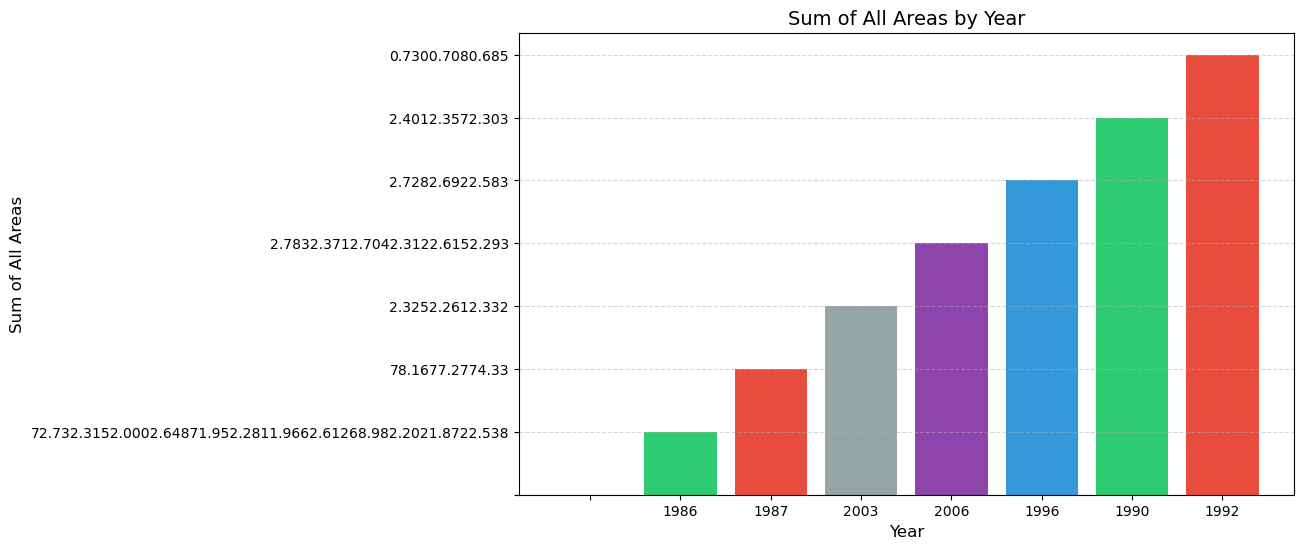

In [12]:
# Extract unique years from ViewHistory column
dfDailyCOPY['Year'] = dfDailyCOPY['ViewHistory'].str.split('-').str[0]
years = dfDailyCOPY['Year'].unique()

# Calculate the sum of all areas for each year
sum_by_year = []
for year in years:
    sum_by_year.append(dfDailyCOPY[dfDailyCOPY['Year'] == year].iloc[:, 1:4].sum().sum())

# Define custom colors for the bars
bar_colors = ['#3498db', '#2ecc71', '#e74c3c', '#95a5a6', '#8e44ad']

# Create the column chart
plt.figure(figsize=(10, 6))
plt.bar(years, sum_by_year, color=bar_colors)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sum of All Areas', fontsize=12)
plt.title('Sum of All Areas by Year', fontsize=14)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize font styles
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the chart as an image file
plt.savefig('C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Visualization Images & Dashboard/BarChartSumByYear.png')

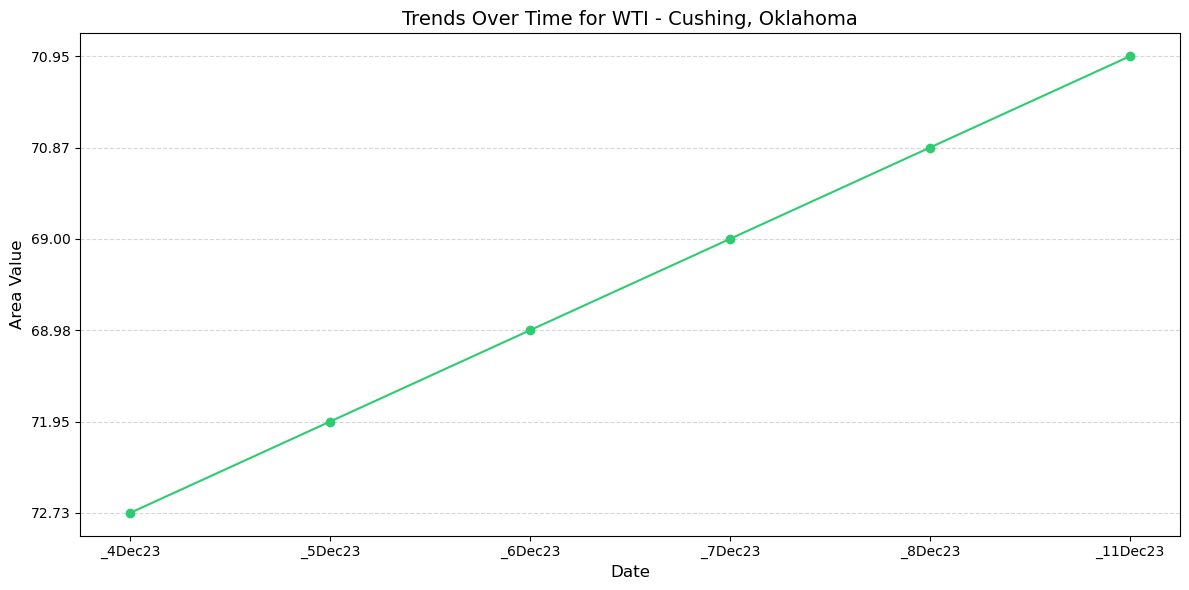

In [13]:
# Select a specific product for analysis
selected_product = 'WTI - Cushing, Oklahoma'

# Filter the DataFrame for the selected product
selected_product_data = dfDailyCOPY[dfDailyCOPY['ProductByArea'] == selected_product]

# Create the line chart for the selected product
plt.figure(figsize=(12, 6))
plt.plot(selected_product_data.columns[1:7], selected_product_data.iloc[0, 1:7], marker='o', color='#2ecc71')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Area Value', fontsize=12)
plt.title(f'Trends Over Time for {selected_product}', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the chart as an image
plt.savefig('C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Visualization Images & Dashboard/WTI Cushing Oklahoma LineChart.png')

# Display the chart
plt.show()

In [14]:
dfMonthlyCOPY = dfMonthly.copy()

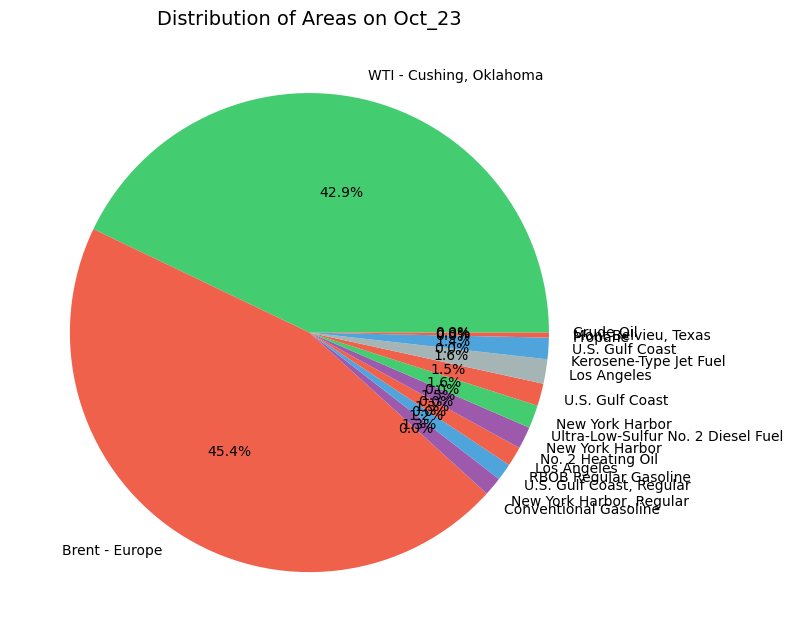

In [15]:
# Select a specific month for analysis
selected_date = 'Oct_23'

# Replace empty or non-numeric values with zeros
dfMonthlyCOPY[selected_date] = pd.to_numeric(dfMonthlyCOPY[selected_date], errors='coerce').fillna(0)

#Colors: 
bar_colors = ['#4fa4db', '#44cc71', '#f0614c', '#a5b5b6', '#9d5aad']


# Create the pie chart for the selected date
plt.figure(figsize=(8, 8))
plt.pie(dfMonthlyCOPY[selected_date], labels=dfMonthlyCOPY['ProductByArea'], autopct='%1.1f%%', colors=bar_colors)
plt.title(f'Distribution of Areas on {selected_date}', fontsize=14)
plt.tight_layout()

# Save the pie chart as an image file
plt.savefig('C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Visualization Images & Dashboard/Distribution of Areas on Oct_23 pie_chart.png')
plt.show()

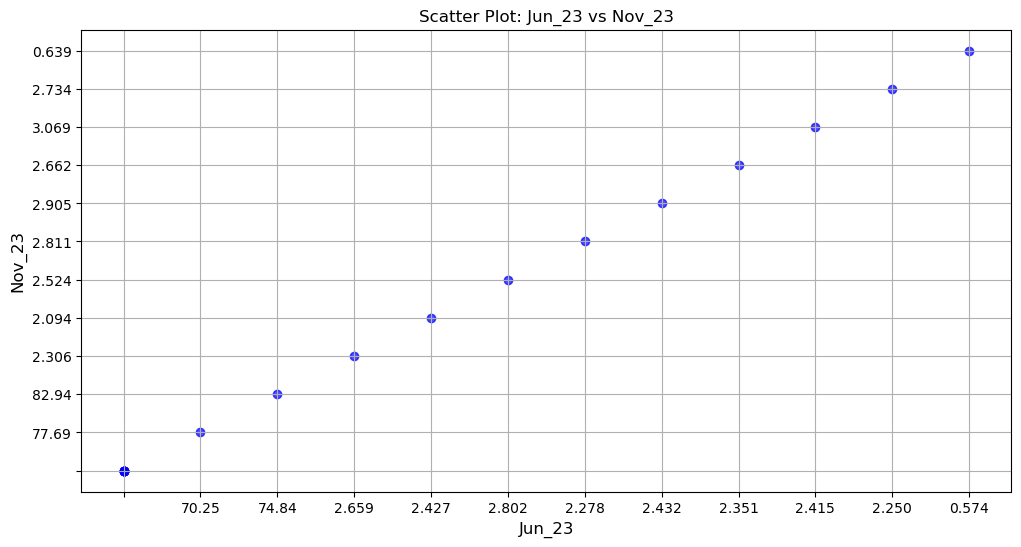

In [16]:
# Scatter Plot for Relationship Between Variables
plt.figure(figsize=(12, 6))
plt.scatter(dfMonthlyCOPY['Jun_23'], dfMonthlyCOPY['Nov_23'], c='blue', alpha=0.7)
plt.title('Scatter Plot: Jun_23 vs Nov_23')
plt.xlabel('Jun_23', fontsize=12)
plt.ylabel('Nov_23', fontsize=12)
plt.grid(True)

# Save the chart as an image
plt.savefig('C:/Users/Asus/Desktop/COOP KAPSARC/Internship Program - Assesment Code/Visualization Images & Dashboard/RelationshipNovJun.png')

# Display the chart
plt.show()